**IMPORTING NECESSARY LIBRARIES** 

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**READING THE DATA**

In [311]:
liver=pd.read_csv('liver_disease_dataset')

In [312]:
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**EXPLORATORY DATA ANALYSIS :-**

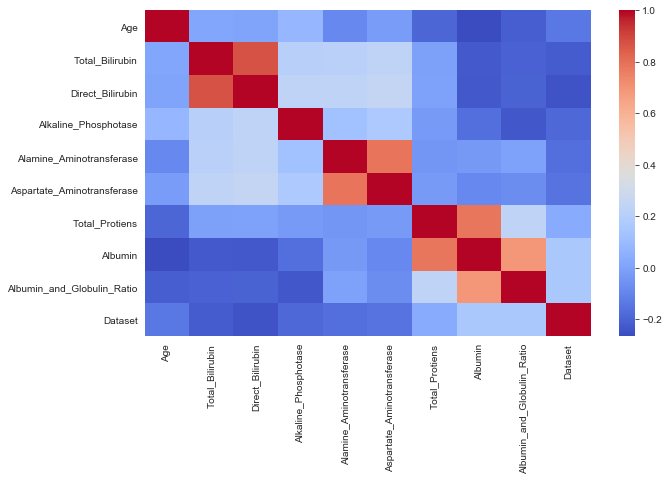

In [313]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(liver.corr(),cmap='coolwarm')

**Quantitites like Direct_Bilirubin,Total_Bilirubin and Aspartate_Aminotransferase,Alamine_Aminotransferase look correlated.**

**ANALYSING THE DATA OF DISEASED PATIENTS**

In [314]:
liver_diseased=liver[liver['Dataset']==1]
liver_diseased

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


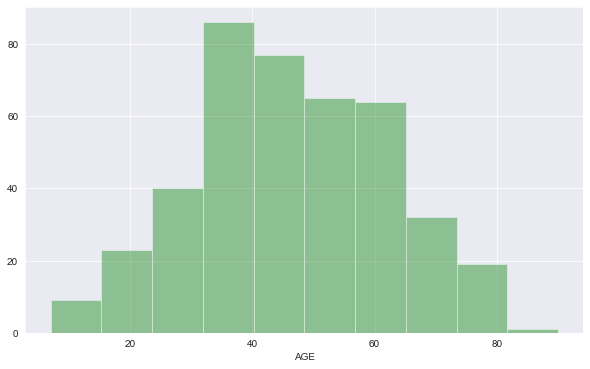

In [315]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,6))
sns.distplot(liver_diseased['Age'],bins=10,kde=False,axlabel='AGE',color='green')

**PEOPLE MOSTLY IN THE AGE GROUP OF 30-40 YEARS ARE DISEASED**

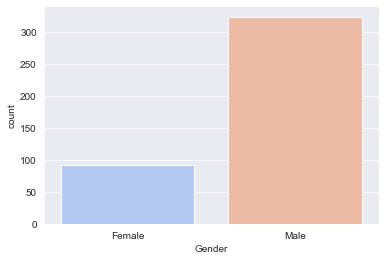

In [316]:
sns.countplot(x='Gender',data=liver_diseased,palette='coolwarm')

**MORE MEN THAN WOMEN ARE DISEASED**

**DATA CLEANING :-**

**MAPPING THE VALUE 2 OF THE DATASET TO 0 - MEANING - NOT DISEASED**

In [317]:
for i in range(583):
    if liver.iloc[i,10]==2:
        liver.iloc[i,10]=0

In [318]:
liver['Dataset'].unique()

array([1, 0])

**CONVERTING TEXTUAL DATA OF GENDER TO NUMERICAL DATA (MALE=0, FEMALE=1) FOR SUITABLY FITTING IN ALGORITHM**

In [319]:
for i in range(583):
    if liver.iloc[i,1]=='Male':
        liver.iloc[i,1]=0
    else:
        liver.iloc[i,1]=1

In [320]:
liver['Gender'].unique()

array([1, 0], dtype=object)

In [321]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**CHECKING FOR NULL VALUES IN EACH COLUMNS**

In [322]:
for i in range(11):
    print(sum(liver.iloc[:,i].isnull()))    


0
0
0
0
0
0
0
0
0
4
0


**FILLING THE NULL VALUES IN THE SECOND LAST COLUMN WITH THE MEAN OF THE VALUES OF THAT COLUMN**

In [323]:
liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [324]:
sum(liver['Albumin_and_Globulin_Ratio'].isnull())

0

**SCALING THE DATA FOR USE BY ALGORITHMS**  

In [325]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(liver.drop('Dataset',axis=1))
scaled_features = scaler.transform(liver.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=liver.columns[:-1])
liver_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [326]:
X=liver_scaled
y=liver['Dataset']

**SPLITTING THE DATA INTO TRAINING AND TESTING SET**

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error

In [329]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [330]:
y_test.value_counts()

1    124
0     51
Name: Dataset, dtype: int64

**SUPPORT VECTOR MACHINES ALGORITHM**

![](svm_image.png)

In [331]:
from sklearn.svm import SVC

In [332]:
model=SVC()

USING GRID SEARCH CV TO FIND THE BEST PARAMETERS

In [333]:
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.732, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.728, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.732, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100, 200, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [334]:
svm_predictions=grid.predict(X_test)

In [335]:
from sklearn.metrics import classification_report,confusion_matrix

In [336]:
svm_acc=accuracy_score(y_test,svm_predictions)
svm_prec=precision_score(y_test,svm_predictions)
svm_rec=recall_score(y_test,svm_predictions)
svm_f1=f1_score(y_test,svm_predictions)
svm_mas=mean_absolute_error(y_test,svm_predictions)
svm_rms=np.sqrt(mean_squared_error(y_test,svm_predictions))

In [370]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.64      0.14      0.23        51
           1       0.73      0.97      0.83       124

    accuracy                           0.73       175
   macro avg       0.68      0.55      0.53       175
weighted avg       0.70      0.73      0.66       175



**LOGISTIC REGRESSION ALGORITHM**

![](logistic_regression.png)

In [338]:
from sklearn.linear_model import LogisticRegression

In [339]:
lg=LogisticRegression()

In [340]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [341]:
lg_predictions=lg.predict(X_test)

In [342]:
lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))

In [343]:
print(classification_report(y_test,lg_predictions))

              precision    recall  f1-score   support

           0       0.63      0.24      0.34        51
           1       0.75      0.94      0.84       124

    accuracy                           0.74       175
   macro avg       0.69      0.59      0.59       175
weighted avg       0.72      0.74      0.69       175



**RANDOM FOREST CLASSIFIER ALGORITHM**

![](ggff5544hh.png)

In [344]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
rfc= RandomForestClassifier(n_estimators=600)

In [346]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [347]:
rfc_predictions=rfc.predict(X_test)

In [348]:
rfc_acc=accuracy_score(y_test,rfc_predictions)
rfc_prec=precision_score(y_test,rfc_predictions)
rfc_rec=recall_score(y_test,rfc_predictions)
rfc_f1=f1_score(y_test,rfc_predictions)
rfc_mas=mean_absolute_error(y_test,rfc_predictions)
rfc_rms=np.sqrt(mean_squared_error(y_test,rfc_predictions))

In [349]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.62      0.25      0.36        51
           1       0.75      0.94      0.83       124

    accuracy                           0.74       175
   macro avg       0.69      0.60      0.60       175
weighted avg       0.71      0.74      0.70       175



**DECISION TREE CLASSIFIER ALGORITHM**

![](1_r5ikdb.jpeg)

In [350]:
from sklearn.tree import DecisionTreeClassifier

In [351]:
dtree=DecisionTreeClassifier()

In [352]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [353]:
dtree_predictions=dtree.predict(X_test)

In [354]:
dtree_acc=accuracy_score(y_test,dtree_predictions)
dtree_prec=precision_score(y_test,dtree_predictions)
dtree_rec=recall_score(y_test,dtree_predictions)
dtree_f1=f1_score(y_test,dtree_predictions)
dtree_mas=mean_absolute_error(y_test,dtree_predictions)
dtree_rms=np.sqrt(mean_squared_error(y_test,dtree_predictions))

In [355]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.40      0.37      0.38        51
           1       0.75      0.77      0.76       124

    accuracy                           0.65       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.65      0.65      0.65       175



**K NEAREST NEIGHBOURS ALGORITHM**

![](knn2.jpg)

In [356]:
from sklearn.neighbors import KNeighborsClassifier

In [357]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

FINDING OUT THE K VALUE FOR LEAST ERROR RATE

Text(0, 0.5, 'Error Rate')

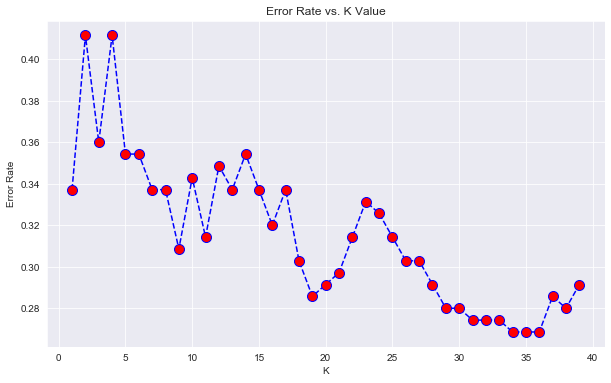

In [358]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [362]:
error_rate[36]

0.2857142857142857

In [364]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(classification_report(y_test,knn_predictions))

WITH K=36


              precision    recall  f1-score   support

           0       0.67      0.16      0.25        51
           1       0.74      0.97      0.84       124

    accuracy                           0.73       175
   macro avg       0.70      0.56      0.55       175
weighted avg       0.72      0.73      0.67       175



In [365]:
knn_acc=accuracy_score(y_test,knn_predictions)
knn_prec=precision_score(y_test,knn_predictions)
knn_rec=recall_score(y_test,knn_predictions)
knn_f1=f1_score(y_test,knn_predictions)
knn_mas=mean_absolute_error(y_test,knn_predictions)
knn_rms=np.sqrt(mean_squared_error(y_test,knn_predictions))

**ANALYSING PERFORMANCE OF EACH OF THE ABOVE MACHINE LEARNING MODELS**

![](1_pOtBHai4jFd-ujaNXPilRg.png)

![](1_lqDsPkfXPGen32Uem1PTNg.png)

![](MAE.png)

In [389]:
d={'Machine Learning Algorithm':['Support Vector Machine','Logistic Regression','Random Forest Classifier','Decision Tree Classifier','K Nearest Neighbours'],'Accuracy_Score':[svm_acc*100,lg_acc*100,rfc_acc*100,dtree_acc*100,knn_acc*100],'Precision_Score':[svm_prec*100,lg_prec*100,rfc_prec*100,dtree_prec*100,knn_prec*100],'Recall_Score':[svm_rec*100,lg_rec*100,rfc_rec*100,dtree_rec*100,knn_rec*100],'F1_Score':[svm_f1*100,lg_f1*100,rfc_f1*100,dtree_f1*100,knn_f1*100],'Mean_Absolute_Error':[svm_mas*100,lg_mas*100,rfc_mas*100,dtree_mas*100,knn_mas*100],'Root_Mean_Square_Error':[svm_rms*100,lg_rms*100,rfc_rms*100,dtree_rms*100,knn_rms*100]}

In [390]:
results=pd.DataFrame(d)

In [391]:
results

,Machine Learning Algorithm,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,Mean_Absolute_Error,Root_Mean_Square_Error
0,Support Vector Machine,72.571429,73.170732,96.774194,83.333333,27.428571,52.372294
1,Logistic Regression,73.714286,75.000000,94.354839,83.571429,26.285714,51.269596
2,Random Forest Classifier,73.714286,75.324675,93.548387,83.453237,26.285714,51.269596
3,Decision Tree Classifier,65.142857,74.803150,76.612903,75.697211,34.857143,59.039938
4,K Nearest Neighbours,73.142857,73.619632,96.774194,83.623693,26.857143,51.823878


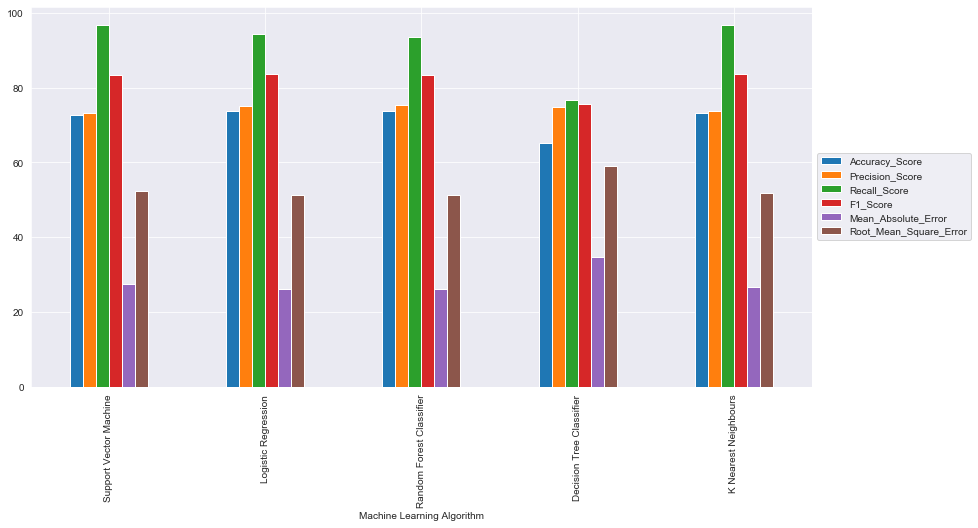

In [442]:
results.plot.bar(x='Machine Learning Algorithm',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))